## Versuch 252:  Aktivierung von Indium und von Silber mit thermischen Neutronen
## Messauswertung Thimo Preis und Tobias Abele am 5.5.2017

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [78]:
unterg = np.loadtxt('Daten/UntergrundAG_TA_TP.dat',usecols=[1])

In [142]:
mittelw_unterg=np.mean(unterg)*4
fehler_unterg=np.mean(unterg)/np.sqrt(len(unterg))
print('Mittelwert:',mittelw_unterg, 'Fehler:',fehler_unterg)

Mittelwert: 14.15 Fehler: 0.39550452352


In [143]:
n1=np.loadtxt('Daten/AG_TA_TP_1.dat',usecols=[1])
n2=np.loadtxt('Daten/AG_TA_TP_2.dat',usecols=[1])
n3=np.loadtxt('Daten/AG_TA_TP_3.dat',usecols=[1])
n4=np.loadtxt('Daten/AG_TA_TP_4.dat',usecols=[1])
n4 = n4[:1]
N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)

In [144]:
t=np.arange(5,405,10)

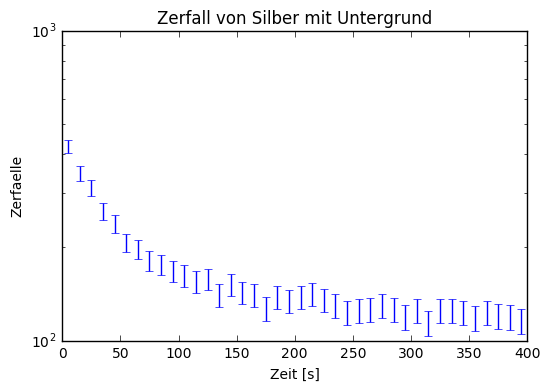

In [145]:
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')

First Fit:

In [139]:
y0=mittelw_unterg # Untergrund
def fit_func(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t,N,p0=[500,0.02,50,0.001],sigma=Fehler_N)

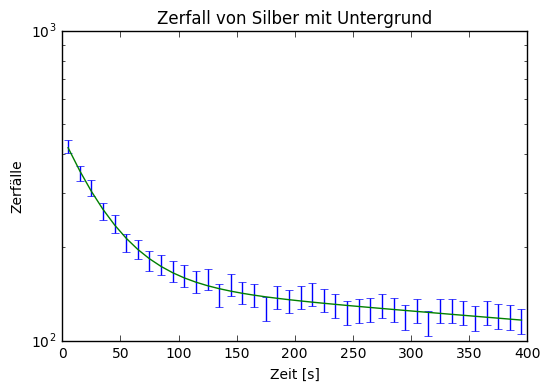

In [146]:
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('figures/Silber.pdf',format='pdf')

In [147]:
#Dies sind alle FItparameter
print("A1=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("l1=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
print("A2=",popt[2],",Standardfehler=",np.sqrt(pcov[2][2]))
print("l2=",popt[3],",Standardfehler=",np.sqrt(pcov[3][3]))
l1m = popt[1]
l2m = popt[3]
fehler_l1m = np.sqrt(pcov[1][1])
fehler_l2m = np.sqrt(pcov[3][3])

A1= 304.767600751 ,Standardfehler= 8.21060177468
l1= 0.0279598329241 ,Standardfehler= 0.00139247822929
A2= 150.093427844 ,Standardfehler= 4.29085660537
l2= 0.000732791456484 ,Standardfehler= 0.000101189314765


In [148]:
#Wie ist die Güte des FIts ?
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #degrees of freedom, Anzahl der Messwerte minus Anzahl der Fitparamtere
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 5.68593118708
chi2_red= 0.157942532974


In [149]:
#Fitwahrscheinlichkeit: Wharscheinlichkeit bei Wiederholungsmessung ein chi2 Wert zu kriegen, der größer gleich dem vorigen ist.
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 100.0 %


Second Fit:

In [88]:
#In diesem zweiten und dritten FIt werden die Fehler des Untergrundes mit berücksichtigt.
#Hier wird zunächst vom Untergrund der 1sigma Fehler des Untergrundes abgezogen."y0" genannt als Fitparamter
y0=mittelw_unterg-fehler_unterg#Daher hier minus
def fit_func(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t,N,p0=[500,0.02,50,0.001],sigma=Fehler_N)

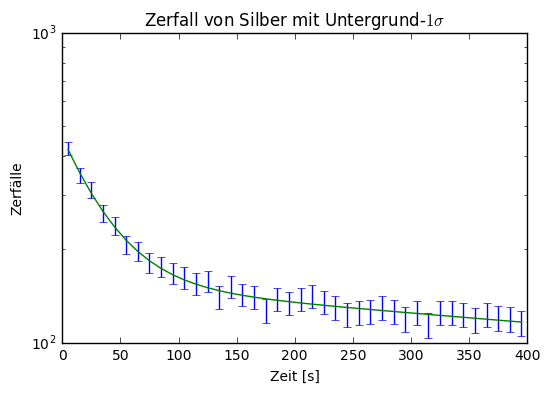

In [89]:
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund-$1\\sigma$')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('figures/Silber-sigma.pdf',format='pdf')

In [90]:
print("A1-=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("l1-=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
print("A2-=",popt[2],",Standardfehler=",np.sqrt(pcov[2][2]))
print("l2-=",popt[3],",Standardfehler=",np.sqrt(pcov[3][3]))
l1min = popt[1]
l2min = popt[3]


A1-= 304.587283726 ,Standardfehler= 8.22040274493
l1-= 0.0279982357556 ,Standardfehler= 0.00140087895941
A2-= 140.600659973 ,Standardfehler= 4.34953676043
l2-= 0.000796846588648 ,Standardfehler= 0.000109770129065


In [91]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 5.67949853647
chi2_red= 0.157763848235


In [92]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 100.0 %


Third Fit:

In [93]:
#Hier wird nun der 1sigma Fehler des Untergrundes hinzu addiert
y0=mittelw_unterg+fehler_unterg#Daher hier plus
def fit_func(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t,N,p0=[500,0.02,50,0.001],sigma=Fehler_N)

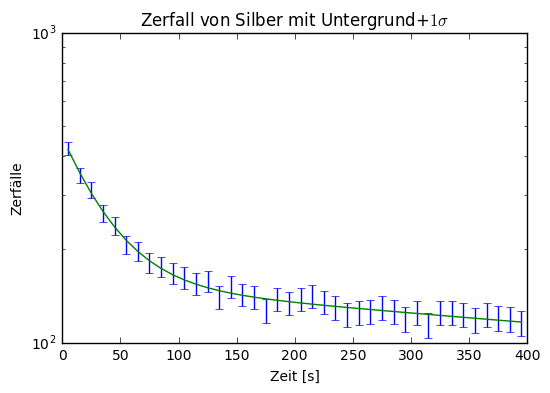

In [94]:
plt.errorbar(t,N,Fehler_N,linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund+$1\\sigma$')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('figures/Silber+sigma.pdf',format='pdf')

In [95]:
print("A1+=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("l1+=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
print("A2+=",popt[2],",Standardfehler=",np.sqrt(pcov[2][2]))
print("l2+=",popt[3],",Standardfehler=",np.sqrt(pcov[3][3]))
l1max = popt[1]
l2max = popt[3]

A1+= 304.571151487 ,Standardfehler= 8.22129339706
l1+= 0.0280016539349 ,Standardfehler= 0.00140162899771
A2+= 139.83300235 ,Standardfehler= 4.35478482579
l2+= 0.000802534515506 ,Standardfehler= 0.000110530317952


In [96]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 5.67893063149
chi2_red= 0.157748073097


In [97]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 100.0 %


Nun wird die Differenz der jeweiligen Zerfallskonstanten des zweiten und dritten Fit zur jeweiligen Zerfallskonstanten aus dem ersten Fit bestimmt:
    

In [98]:

diff_l1_l1min = abs(l1m - l1min)
diff_l2_l2min = abs(l2m - l2min)
diff_l1_l1max = abs(l1m - l1max)
diff_l2_l2max = abs(l2m - l2max)

print("|l1 - l1-|=", diff_l1_l1min)
print("|l2 - l2-|=", diff_l2_l2min)
print("|l1 - l1+|=", diff_l1_l1max)
print("|l2 - l2+|=", diff_l2_l2max)


|l1 - l1-|= 1.70335579894e-06
|l2 - l2-|= 2.83390787919e-06
|l1 - l1+|= 1.71482353984e-06
|l2 - l2+|= 2.85401897904e-06


In [99]:
#Der Fehler der DIfferenzen: Mittelwert der Differenz quadratisch zu Fehler aus Fit 1 addiert
diff_l1_mean = (diff_l1_l1min + diff_l1_l1max)/2
diff_l2_mean = (diff_l2_l2min + diff_l2_l2max)/2
gesamtfehler_l1 = np.sqrt(fehler_l1m**2 + diff_l1_mean**2) 
gesamtfehler_l2 = np.sqrt(fehler_l2m**2 + diff_l2_mean**2) 
print("Gesamtfehler l1:", gesamtfehler_l1)
print("Gesamtfehler l2:", gesamtfehler_l2)

Gesamtfehler l1: 0.00140125356297
Gesamtfehler l2: 0.000110185620465


In [100]:
#Damit ergeben sich die Halbwertszeiten:
def HWZ(l):
    return np.log(2)/l 
def Fehler_HWZ(l, deltal):
    return  np.log(2)/l**2 * deltal
print("Halbwertszeit 110 Ag",HWZ(l1m), chr(137), Fehler_HWZ(l1m, gesamtfehler_l1))
print("Halbwertszeit 108 Ag",HWZ(l2m), chr(137), Fehler_HWZ(l2m, gesamtfehler_l2))

Halbwertszeit 110 Ag 24.7553102813  1.23887650599
Halbwertszeit 108 Ag 866.780149785  119.431084071


Auswertung der Indium-Messung

In [103]:
unterg = np.loadtxt('Daten/UntergrundAG_TA_TP.dat',usecols=[1])

In [104]:
n5 = np.loadtxt('Daten/IN_TA_TP.dat',usecols=[1])
Fehler_n5 = np.sqrt(n5)
n5s = n5[1:n5.size]#Der rausspringende erste Wert von Indium
Fehler_n5s = np.sqrt(n5s)#Der rausspringende erste Wert von Indium

In [105]:
t2=np.arange(60,3060,120)
t2s=np.arange(180,3060,120)

(300.0, 1000.0)

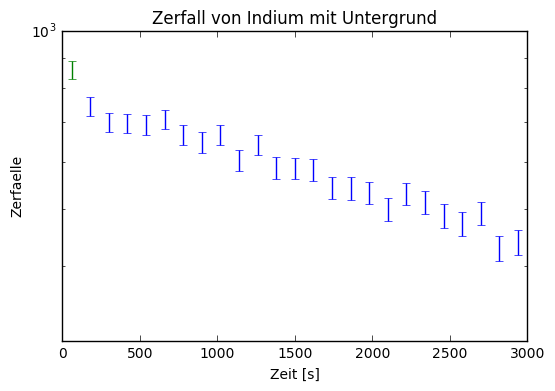

In [129]:
plt.errorbar(t2s,n5s,Fehler_n5s,linestyle='None')
plt.errorbar(t2[0],n5[0],Fehler_n5[0],linestyle='None')#Der rausspringende erste Wert von Indium
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.ylim(3e2,1e3)

First Fit

In [107]:
y0=mittelw_unterg*12 # Untergrund
def fit_func(x,Ain,lin):
    return Ain*np.exp(-x*lin)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t2s,n5s,p0=[500,0.02],sigma=Fehler_n5s)

C:\Users\ThimoPreis\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


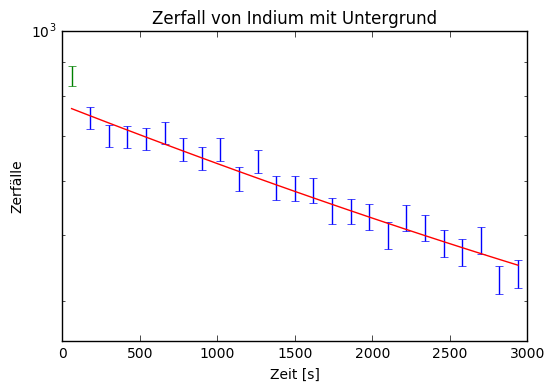

In [132]:
plt.errorbar(t2s,n5s,Fehler_n5s,linestyle='None')
plt.errorbar(t2[0],n5[0],Fehler_n5[0],linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t2,fit_func(t2,*popt))
plt.ylim(3.5e2,1e3)
plt.savefig('figures/Indium.pdf',format='pdf')


In [109]:
print("Ain1=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("lin1=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
l1in = popt[1]
fehler_l1in = np.sqrt(pcov[1][1])

Ain1= 606.957710533 ,Standardfehler= 10.7667682797
lin1= 0.000261134445589 ,Standardfehler= 1.13737004039e-05


In [110]:
chi2_=np.sum((fit_func(t2s,*popt)-n5s)**2/Fehler_n5s**2)
dof=len(n5s)-2 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 13.3236720337
chi2_red= 0.605621456075


In [111]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 92.0 %


Second fit : Vom Untergrund wird der 1sigma Fehler des Untergrundes abgezogen

In [112]:
y0=mittelw_unterg*12-fehler_unterg*12 # Untergrund
def fit_func(x,Ain,lin):
    return Ain*np.exp(-x*lin)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t2s,n5s,p0=[500,0.02],sigma=Fehler_n5s)

C:\Users\ThimoPreis\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


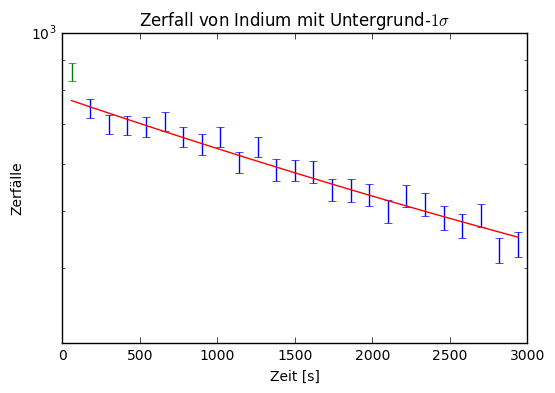

In [133]:
plt.errorbar(t2s,n5s,Fehler_n5s,linestyle='None')
plt.errorbar(t2[0],n5[0],Fehler_n5[0],linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund-$1\\sigma$')
plt.yscale('log')
plt.plot(t2,fit_func(t2,*popt))
plt.ylim(3e2,1e3)
plt.savefig('figures/Indium-1sigma.pdf',format='pdf')

In [114]:
print("Ain1=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("lin1=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
l1inmin = popt[1]
fehler_l1inmin = np.sqrt(pcov[1][1])

Ain1= 611.419078023 ,Standardfehler= 10.7187721841
lin1= 0.000258176200107 ,Standardfehler= 1.12138385518e-05


In [115]:
chi2_=np.sum((fit_func(t2s,*popt)-n5s)**2/Fehler_n5s**2)
dof=len(n5s)-2 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 13.2681049178
chi2_red= 0.603095678081


In [116]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 93.0 %


Third fit: Zum Untergrund wird der 1sigma Fehler des Untergrundes zuaddiert

In [117]:
y0=mittelw_unterg*12+fehler_unterg*12 # Untergrund
def fit_func(x,Ain,lin):
    return Ain*np.exp(-x*lin)+y0
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func,t2s,n5s,p0=[500,0.02],sigma=Fehler_n5s)

C:\Users\ThimoPreis\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


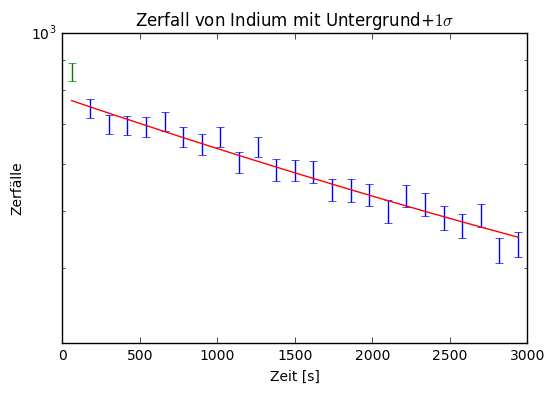

In [134]:
plt.errorbar(t2s,n5s,Fehler_n5s,linestyle='None')
plt.errorbar(t2[0],n5[0],Fehler_n5[0],linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund+$1\\sigma$')
plt.yscale('log')
plt.plot(t2,fit_func(t2,*popt))
plt.ylim(3e2,1e3)
plt.savefig('figures/Indium+sigma.pdf',format='pdf')

In [119]:
print("Ain1=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("lin1=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))
l1inmax = popt[1]
fehler_l1inmax = np.sqrt(pcov[1][1])

Ain1= 602.502477877 ,Standardfehler= 10.8162962122
lin1= 0.000264160548464 ,Standardfehler= 1.1538438386e-05


In [120]:
chi2_=np.sum((fit_func(t2s,*popt)-n5s)**2/Fehler_n5s**2)
dof=len(n5s)-2 #degrees of freedom
chi2_red=chi2_/dof
print("chi2=",chi2_)
print("chi2_red=",chi2_red)

chi2= 13.3813679489
chi2_red= 0.608243997679


In [121]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=",prob,"%")

Wahrscheinlichkeit= 92.0 %


In [122]:
diff_l1_l1min_in = abs(l1in - l1inmin)
diff_l1_l1max_in = abs(l1in - l1inmax)


print("|l1 - l1-|=", diff_l1_l1min_in)
print("|l1 - l1+|=", diff_l1_l1max_in)

diff_l1_mean_in = (diff_l1_l1min_in + diff_l1_l1max_in)/2
gesamtfehler_l1_in = np.sqrt(fehler_l1in**2 + diff_l1_mean_in**2) 
print("Gesamtfehler l1:", gesamtfehler_l1_in)

|l1 - l1-|= 2.95824548194e-06
|l1 - l1+|= 3.0261028747e-06
Gesamtfehler l1: 1.17607043662e-05


In [126]:
#Damit ergeben sich die Halbwertszeiten:
def HWZ(l):
    return np.log(2)/l 
def Fehler_HWZ(l,deltal):
    return  np.log(2)/l**2 *deltal
print("Halbwertszeit 116 In",HWZ(l1in), chr(137), Fehler_HWZ(l1in,gesamtfehler_l1_in))

Halbwertszeit 116 In 2654.36901285  119.544739372
